# Best Practices in Python

~1.5 hours

* Jupyter Notebook:
  * Command vs Edit mode
  * markdown vs code cells
  * autocomplete
  * function hints

* Tips we're covering
  * concise/readable Python
  * things that might trip you up
  * fundamentals of numpy

# tuple unpacking and enumeration

In [ ]:
names = ["a", "b", "c"]

In [ ]:
# say we want to capitalize each name in a list

# common way:
capital_names = []
for i in range(len(names)):
    capital_names.append(names[i].capitalize())
print(capital_names)

In [ ]:
# better way
capital_names = {}

# what does enumerate do?
for i, name in enumerate(names):
    print(i,name)
    
for i, name in enumerate(names):
    capital_names[i] = name.capitalize()
print(capital_names)

# enumerate takes an iterable object, and returns an index and each element of the iterable
# whenever you see yourself using range(len(x)), decent chance you actually want to just use enumerate

In [ ]:
# what's happening?

print(list(enumerate(names)))
print("")

# this for loop packs tuples of index/item pairs
for item in enumerate(names):
    print(item)

print("")

# this for loop immediately unpacks each tuple
for i, name in enumerate(names):
    print(i, name)


In [ ]:
# similar example using zip

countries = ["Algeria", "Bhutan", "Chad"]

# bad
for i in range(len(names)):
    print(names[i], countries[i])
print("")

# maybe better?
for i, name in enumerate(names):
    print(name, countries[i])
print("")

# better
for temp in zip(names, countries):
    print(temp)
print("")

for name, country in zip(names, countries):
    print(name, country)

# no indices at all, directly accessing items

# list comprehensions

In [ ]:
items = []

for n in range(100):
    items.append(n**2)
print(items)

In [ ]:
# more concise

items = [n**2 for n in range(100)]
print(items)

# list comprehension basically says "make a list where each item is the square of the set of numbers in this range"

In [ ]:
# dictionary comprehension
capital_names = {index: name.capitalize() for index, name in enumerate(names)}
print(capital_names)

Oftentimes, if you can avoid using indices (or more generally, creating unecessary variables) the better. This way, you don't accidentally use an old index later on.

In [ ]:
# you can do filtered list comprehensions
capital_names = {index: name.capitalize() for index, name in enumerate(names) if index%2 == 0}
print(capital_names)

In [ ]:
# squaring example
items = []
for n in range(100):
    if n < 50 or n > 70:
        items.append(n**2)
print(items)

print("")
items = [n**2 for n in range(100) if n < 50 or n > 70]
print(items)

In [ ]:
# you can do nested list comprehensions


letter_country_combos = [(letter, country) for letter in names for country in countries]
print(letter_country_combos)

# inline if-else

In [ ]:
x = 10

if x < 20:
    y = 3
else:
    y = 33
print(y)

In [ ]:
y = 3 if x < 20 else 33
print(y)

alternating letters example

In [ ]:
letters = []
for i in range(10):
    if i % 2 == 0:
        letters.append("a")
    else:
        letters.append("b")
letters

using inline if-else

In [ ]:
letters = []
for i in range(10):
    letters.append("a" if i % 2 == 0 else "b")
letters

using inline if-else and list comprehension

In [ ]:
letters = ["a" if i % 2 == 0 else "b" for i in range(10)]
letters

# tuple unpacking

In [ ]:
a, b = (1, 2)

In [ ]:
start_step_step = (1, 10, 2)

In [ ]:
range(start_step_step)  # show that this errors

In [ ]:
range(*start_step_step)

# negative indexing

In [ ]:
# access elements from the end of a list
countries

In [ ]:
countries[0]

In [ ]:
countries[-1]

In [ ]:
# good for if you have a list of unknown size
# also avoids something like
countries[len(countries)-1]

In [ ]:
# negative index slicing

countries[-2:]

In [ ]:
# numerical example - rolling average of the last n elements (similar to the relaxation method hw)

x = list(range(100))

def average_last_n(some_list, n):
    return sum(some_list[-n:])/n

average_last_n(x,20)

# f-strings

In [ ]:
cows_count = 99
chickens_count = 42

# I want to print "I have 99 cows and 42 chickens"
# I want to print "I have [99+42] animals"

# bad - have to do casting and keep track of spaces
print("I have " + str(cows_count) + " cows and " + str(chickens_count) + " chickens")

# better - no casting, but now you have to remember that a space is added automatically
# also, still annoying to read
print("I have", cows_count, "cows and", chickens_count, "chickens")

# best in most cases
# no casting, explicit spaces, easiest to reach
print(f"I have {cows_count} cows and {chickens_count} chickens")

# can also do operations inside the curly braces!
print(f"I have {cows_count+chickens_count} animals")


# Numpy

Numpy is an extremely useful and commonly-used library. It's the backbone of just about all scientific and machine learning code in Python.

## Vectorization

In [1]:
import numpy as np


In [2]:
# skip

# for-loop exponentiation

items = []
for i in range(10):
    items.append(np.exp(i))
items

[1.0,
 2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766,
 403.4287934927351,
 1096.6331584284585,
 2980.9579870417283,
 8103.083927575384]

In [11]:
%%timeit       # needs to be at the very start of the cell, no code or comments above it

# list comprehension
[np.exp(1) for i in range(10000)]


18.5 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In the general form above, np.exp() has to figure out what type i is at every iteration before acting on it.

In [13]:
%%timeit

# this performs the function np.exp() on "element-wise," that is on each element handed to it
np.exp(np.ones(10000))

108 µs ± 5.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In the vectorized from above, np.arange(10) is known by numpy to be a homogenous array, so there is much less overhead of figuring out typing and what to do with it when we hit np.exp. We actually get to take advantage of underlying, much fast C code.

In [14]:
# two-array example

In [21]:
%%timeit
[xi*yi for xi, yi in zip(range(1000), range(1000,2000))]

106 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
%%timeit
np.arange(1000)*np.arange(1000,2000)

# actually calls np.matmul under the hood

3.88 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## multi-dimensional arrays

In [25]:
# 0D array (or a scalar)

x = np.array(10)
x

array(10)

In [27]:
x.item()    # item() only works on a 0D array

10

In [32]:
# 1D array - only needs 1 index to uniquely point to any particular item

x = np.array([5,4,3,2,1])
x

array([5, 4, 3, 2, 1])

In [48]:
# 2D array
x = np.arange(9)
print(x)

x = x.reshape(3,3)
print(x)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [49]:
x[2,1]      # remember that we are zero-indexed! - row 2 column 1

7

In [50]:
# 3D array
x = np.arange(27).reshape(3,3,3)
print(x)    # can think about these as "sheets" of 2D arrays - sheets, rows, columns

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [51]:
# how do we access the number 14?
x[1,1,2]

14

In [52]:
# 4D!
x = np.arange(3**4).reshape(3,3,3,3)

In [53]:
x[2,1,0,2]

65

In [46]:
# what dimensionality would a "stack" of images be?
# 3D if grayscale, 4D if RGB

In [54]:
# slicing

x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [55]:
x[0]

array([0, 1, 2])

In [56]:
x[0,:]   # : means "everything in this dimension"

array([0, 1, 2])

In [59]:
# what would x[1] be?
x[1]

# you can do this, though I find it helpful to have the [1,:] to remind yourself of the array dimensionality

array([3, 4, 5])

In [60]:
x[:,1]

array([1, 4, 7])

In [98]:
x = np.arange(27).reshape(3, 3, 3)
x

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [99]:
# what would this give? x[:,:,2]     # remember - sheet, row, column

x[:,:,2]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [100]:
# slicing also works when there are multiple indices that aren't a single number of a ":"
x[1:, :, 2]

array([[11, 14, 17],
       [20, 23, 26]])

In [101]:
# slicing with step sizes!
# start:stop:stepsize

x[:,0:3:2,1]   # all sheets, start at row 0, go up to but not including row 3, with a step size of 2, column 1

array([[ 1,  7],
       [10, 16],
       [19, 25]])

In [102]:
# can just use two colons, which default to start and end, allowing you to just specify a step size
np.all(x[:,::2,1] == x[:,0:3:2,1])

True

In [103]:
# can do negative steps!
x[:,:,::-1]            # reverses all columns in each row in each sheet

array([[[ 2,  1,  0],
        [ 5,  4,  3],
        [ 8,  7,  6]],

       [[11, 10,  9],
        [14, 13, 12],
        [17, 16, 15]],

       [[20, 19, 18],
        [23, 22, 21],
        [26, 25, 24]]])

In [104]:
x[::-1,::-1,::-1]     # reverses the entire "cube" of numbers

array([[[26, 25, 24],
        [23, 22, 21],
        [20, 19, 18]],

       [[17, 16, 15],
        [14, 13, 12],
        [11, 10,  9]],

       [[ 8,  7,  6],
        [ 5,  4,  3],
        [ 2,  1,  0]]])

In [106]:
# ellipses - they fill in as many indices as needed to make the provided indices work

x[...,2]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [107]:
np.all(x[...,2]==x[:,:,2])

True

In [108]:
x[2,...]

array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [109]:
x[...,1,...]    # this doesn't work!

IndexError: an index can only have a single ellipsis ('...')

In [83]:
# applications - flipping images!
import matplotlib.pyplot as plt

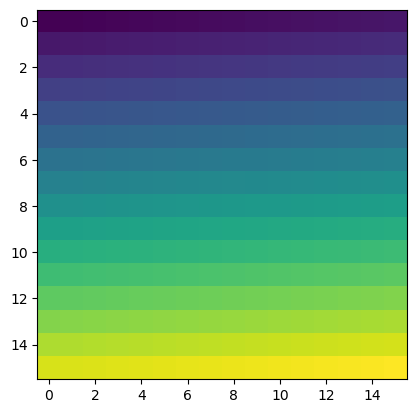

In [92]:
x = np.arange(256).reshape(16,16)
plt.imshow(x)

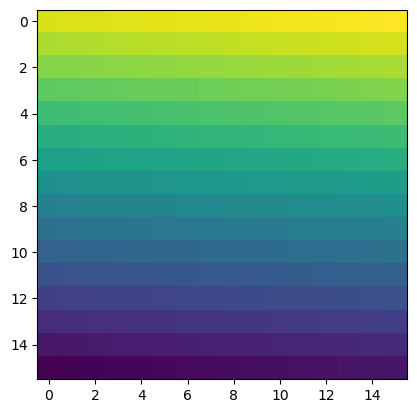

In [93]:
# flipped vertically
plt.imshow(x[::-1,:])

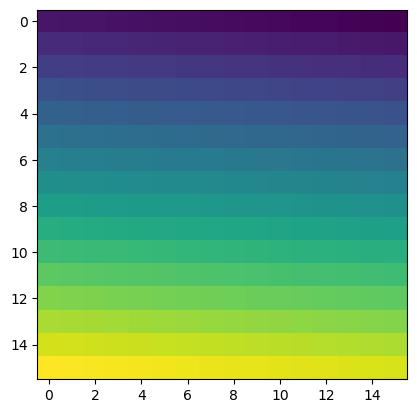

In [94]:
# flipped horizontally
plt.imshow(x[:,::-1])

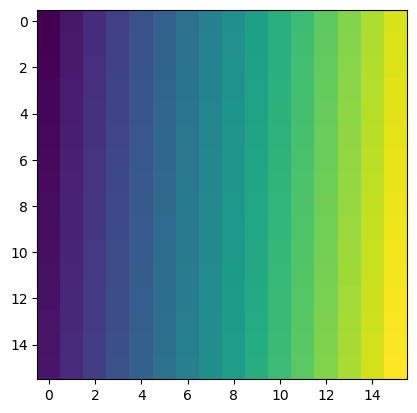

In [95]:
# transpose (flipped along diagonal)
plt.imshow(x.T)

In [120]:
rgb_img = np.arange(32*32*3).reshape(32,32,3)     # H x W x channels
rgb_img

array([[[   0,    1,    2],
        [   3,    4,    5],
        [   6,    7,    8],
        ...,
        [  87,   88,   89],
        [  90,   91,   92],
        [  93,   94,   95]],

       [[  96,   97,   98],
        [  99,  100,  101],
        [ 102,  103,  104],
        ...,
        [ 183,  184,  185],
        [ 186,  187,  188],
        [ 189,  190,  191]],

       [[ 192,  193,  194],
        [ 195,  196,  197],
        [ 198,  199,  200],
        ...,
        [ 279,  280,  281],
        [ 282,  283,  284],
        [ 285,  286,  287]],

       ...,

       [[2784, 2785, 2786],
        [2787, 2788, 2789],
        [2790, 2791, 2792],
        ...,
        [2871, 2872, 2873],
        [2874, 2875, 2876],
        [2877, 2878, 2879]],

       [[2880, 2881, 2882],
        [2883, 2884, 2885],
        [2886, 2887, 2888],
        ...,
        [2967, 2968, 2969],
        [2970, 2971, 2972],
        [2973, 2974, 2975]],

       [[2976, 2977, 2978],
        [2979, 2980, 2981],
        [2982, 2

In [121]:
bgr_img = rgb_img[...,::-1]
bgr_img

array([[[   2,    1,    0],
        [   5,    4,    3],
        [   8,    7,    6],
        ...,
        [  89,   88,   87],
        [  92,   91,   90],
        [  95,   94,   93]],

       [[  98,   97,   96],
        [ 101,  100,   99],
        [ 104,  103,  102],
        ...,
        [ 185,  184,  183],
        [ 188,  187,  186],
        [ 191,  190,  189]],

       [[ 194,  193,  192],
        [ 197,  196,  195],
        [ 200,  199,  198],
        ...,
        [ 281,  280,  279],
        [ 284,  283,  282],
        [ 287,  286,  285]],

       ...,

       [[2786, 2785, 2784],
        [2789, 2788, 2787],
        [2792, 2791, 2790],
        ...,
        [2873, 2872, 2871],
        [2876, 2875, 2874],
        [2879, 2878, 2877]],

       [[2882, 2881, 2880],
        [2885, 2884, 2883],
        [2888, 2887, 2886],
        ...,
        [2969, 2968, 2967],
        [2972, 2971, 2970],
        [2975, 2974, 2973]],

       [[2978, 2977, 2976],
        [2981, 2980, 2979],
        [2984, 2

In [ ]:
# you don't need to import Python Image Library (PIL), or OpenCV, or any other image processing library to do these operations!

# (sometimes Stack Overflow and ChatGPT will recommend them...)

Note that whenever we index into a numpy array, we are getting a "view" of the data - a reference to it rather than a copy of it.

Pro: no copying overhead
Con: ?

In [137]:
x = np.ones([3,3])
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [138]:
y = x[:,1]
y

array([1., 1., 1.])

In [139]:
y *= 5
y

array([5., 5., 5.])

In [140]:
x

array([[1., 5., 1.],
       [1., 5., 1.],
       [1., 5., 1.]])

In [145]:
# bad news, this also happens with functions!

def mult_pi(A):
    A[...,-1] *= np.pi
    return A

In [146]:
x = np.ones([3,3])
mult_pi(x)     # expected...

array([[1.        , 1.        , 3.14159265],
       [1.        , 1.        , 3.14159265],
       [1.        , 1.        , 3.14159265]])

In [147]:
x    # bad!

array([[1.        , 1.        , 3.14159265],
       [1.        , 1.        , 3.14159265],
       [1.        , 1.        , 3.14159265]])

In [148]:
# avoid this by not using in-place operations

def mult_pi_plusplus(A):
    return A[...,-1] * np.pi


In [149]:
x = np.ones([3,3])
mult_pi_plusplus(x)    # expected...

array([3.14159265, 3.14159265, 3.14159265])

In [150]:
x   # hooray!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])